In [20]:
!pip install xgboost

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import xgboost
%matplotlib inline
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\sator\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
bitcoin_df = pd.read_csv('Data/bitcoin_df.csv', parse_dates=True)
bitcoin_df = bitcoin_df.rename(columns={"Unnamed: 0":"date"})
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date']).dt.date
bitcoin_df.head()

,date,datetime,open,high,low,close,volume,returns,class
0,2017-08-18,1.503014e+09,4285.08,4371.52,3938.77,4108.37,1199.888264,-0.041238,0
1,2017-08-19,1.503101e+09,4108.37,4184.69,3850.00,4139.98,381.309763,0.007694,0
2,2017-08-20,1.503187e+09,4120.98,4211.08,4032.62,4086.29,467.083022,-0.012969,0
3,2017-08-21,1.503274e+09,4069.13,4119.62,3911.79,4016.00,691.743060,-0.017201,0
4,2017-08-22,1.503360e+09,4016.00,4104.82,3400.00,4040.00,966.684858,0.005976,0


In [23]:
google_trend_df = pd.read_csv('Data/btc_google_trend.csv', parse_dates=True)
google_trend_df['date'] = pd.to_datetime(google_trend_df['date']).dt.date
google_trend_df = google_trend_df.rename(columns={"bitcoin":"google trend"})
google_trend_df.head()

,date,google trend
0,2017-08-18,1967
1,2017-08-19,1844
2,2017-08-20,1704
3,2017-08-21,1702
4,2017-08-22,1893


In [24]:
reddit_sentiments_df = pd.read_csv('Data/reddit_sentiments_df.csv')
reddit_sentiments_df.drop('Unnamed: 0', axis=1, inplace=True)
reddit_sentiments_df = reddit_sentiments_df.rename(columns={"text":"Reddit text"})
reddit_sentiments_df.head()

,datetime,Reddit text,Reddit compound,Reddit positive,Reddit negative,Reddit neutral
0,1.503014e+09,it´s an old bitcoin breadwallet! This is good ...,0.9999,0.132,0.082,0.786
1,1.503101e+09,My favourite part is when he calls r/btc more ...,0.9998,0.122,0.090,0.788
2,1.503187e+09,That feeling when your friends talked you out ...,0.9998,0.128,0.109,0.763
3,1.503274e+09,if you had any doubt: this is how you fight bi...,0.9998,0.129,0.104,0.767
4,1.503360e+09,&gt; At the end she broke down crying saying ...,0.9998,0.131,0.108,0.761


In [25]:
google_sentiments_df = pd.read_csv('Data/google_sentiment_df.csv')
google_sentiments_df['date'] = pd.to_datetime(google_sentiments_df['date']).dt.date
google_sentiments_df.head()

,date,Google text,Google compound,Google positive,Google negative,Google neutral
0,2017-08-18,Hedge funds have long been a popular choice fo...,0.9848,0.150,0.000,0.850
1,2017-08-19,Gemini also acknowledges this is not their fir...,0.7096,0.059,0.027,0.914
2,2017-08-20,Bitcoin ATM company LocalCoinATM recently open...,0.8910,0.076,0.017,0.907
3,2017-08-21,Members of the U.S. Congress are drafting legi...,0.6359,0.111,0.076,0.814
4,2017-08-22,"Aug.22 -- Ben Brabyn, head of Level39, discuss...",0.6808,0.065,0.036,0.900


In [26]:
bitcoin_df = bitcoin_df.merge(google_trend_df, on="date")
bitcoin_df.head()

,date,datetime,open,high,low,close,volume,returns,class,google trend
0,2017-08-18,1.503014e+09,4285.08,4371.52,3938.77,4108.37,1199.888264,-0.041238,0,1967
1,2017-08-19,1.503101e+09,4108.37,4184.69,3850.00,4139.98,381.309763,0.007694,0,1844
2,2017-08-20,1.503187e+09,4120.98,4211.08,4032.62,4086.29,467.083022,-0.012969,0,1704
3,2017-08-21,1.503274e+09,4069.13,4119.62,3911.79,4016.00,691.743060,-0.017201,0,1702
4,2017-08-22,1.503360e+09,4016.00,4104.82,3400.00,4040.00,966.684858,0.005976,0,1893


In [27]:
bitcoin_df = bitcoin_df.merge(reddit_sentiments_df, on="datetime")
bitcoin_df = bitcoin_df.merge(google_sentiments_df, on="date")
bitcoin_df.head()

,date,datetime,open,high,low,close,volume,returns,class,google trend,Reddit text,Reddit compound,Reddit positive,Reddit negative,Reddit neutral,Google text,Google compound,Google positive,Google negative,Google neutral
0,2017-08-18,1.503014e+09,4285.08,4371.52,3938.77,4108.37,1199.888264,-0.041238,0,1967,it´s an old bitcoin breadwallet! This is good ...,0.9999,0.132,0.082,0.786,Hedge funds have long been a popular choice fo...,0.9848,0.150,0.000,0.850
1,2017-08-19,1.503101e+09,4108.37,4184.69,3850.00,4139.98,381.309763,0.007694,0,1844,My favourite part is when he calls r/btc more ...,0.9998,0.122,0.090,0.788,Gemini also acknowledges this is not their fir...,0.7096,0.059,0.027,0.914
2,2017-08-20,1.503187e+09,4120.98,4211.08,4032.62,4086.29,467.083022,-0.012969,0,1704,That feeling when your friends talked you out ...,0.9998,0.128,0.109,0.763,Bitcoin ATM company LocalCoinATM recently open...,0.8910,0.076,0.017,0.907
3,2017-08-21,1.503274e+09,4069.13,4119.62,3911.79,4016.00,691.743060,-0.017201,0,1702,if you had any doubt: this is how you fight bi...,0.9998,0.129,0.104,0.767,Members of the U.S. Congress are drafting legi...,0.6359,0.111,0.076,0.814
4,2017-08-22,1.503360e+09,4016.00,4104.82,3400.00,4040.00,966.684858,0.005976,0,1893,&gt; At the end she broke down crying saying ...,0.9998,0.131,0.108,0.761,"Aug.22 -- Ben Brabyn, head of Level39, discuss...",0.6808,0.065,0.036,0.900


In [28]:
# bitcoin_df = bitcoin_df.set_index('date')
bitcoin_df.drop('datetime', axis=1, inplace=True)
bitcoin_df.head()

,date,open,high,low,close,volume,returns,class,google trend,Reddit text,Reddit compound,Reddit positive,Reddit negative,Reddit neutral,Google text,Google compound,Google positive,Google negative,Google neutral
0,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,-0.041238,0,1967,it´s an old bitcoin breadwallet! This is good ...,0.9999,0.132,0.082,0.786,Hedge funds have long been a popular choice fo...,0.9848,0.150,0.000,0.850
1,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,0.007694,0,1844,My favourite part is when he calls r/btc more ...,0.9998,0.122,0.090,0.788,Gemini also acknowledges this is not their fir...,0.7096,0.059,0.027,0.914
2,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,-0.012969,0,1704,That feeling when your friends talked you out ...,0.9998,0.128,0.109,0.763,Bitcoin ATM company LocalCoinATM recently open...,0.8910,0.076,0.017,0.907
3,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,-0.017201,0,1702,if you had any doubt: this is how you fight bi...,0.9998,0.129,0.104,0.767,Members of the U.S. Congress are drafting legi...,0.6359,0.111,0.076,0.814
4,2017-08-22,4016.00,4104.82,3400.00,4040.00,966.684858,0.005976,0,1893,&gt; At the end she broke down crying saying ...,0.9998,0.131,0.108,0.761,"Aug.22 -- Ben Brabyn, head of Level39, discuss...",0.6808,0.065,0.036,0.900


In [29]:
date_list = bitcoin_df.loc[bitcoin_df['class'] == 1].index.to_list()
# date_list

In [30]:
bitcoin_df['wordbank'] = 0
days_back = 3
for i in range(days_back):
    bitcoin_df.loc[[date - i for date in date_list], 'wordbank'] = 1
# bitcoin_df.loc[date_list, 'wordbank'] = 1
# bitcoin_df.loc[[date - 1 for date in date_list], 'wordbank'] = 1
# bitcoin_df.loc[[date - 2 for date in date_list], 'wordbank'] = 1
bitcoin_df.loc[bitcoin_df['wordbank'] == 1]

,date,open,high,low,close,volume,returns,class,google trend,Reddit text,Reddit compound,Reddit positive,Reddit negative,Reddit neutral,Google text,Google compound,Google positive,Google negative,Google neutral,wordbank
26,2017-09-13,4159.72,4165.38,3760.00,3944.69,913.462545,-0.052604,0,1531,NaN,0.0000,0.000,0.000,0.000,China has banned ICOs and plans to shut down d...,-0.9446,0.037,0.114,0.849,1
27,2017-09-14,3944.00,3993.00,3165.13,3189.02,1665.021543,-0.191566,-1,1807,NaN,0.0000,0.000,0.000,0.000,Subscribe to FT.com here: http://bit.ly/2r8RJz...,0.9700,0.124,0.033,0.843,1
28,2017-09-15,3188.01,3856.00,2817.00,3700.00,1968.866492,0.160231,1,2059,NaN,0.0000,0.000,0.000,0.000,"Roger Ver, the digital currency enthusiast kno...",0.9442,0.116,0.046,0.838,1
53,2017-10-10,4786.95,4960.00,4680.59,4783.06,1043.221773,-0.000813,0,786,Well this thread is a little depressing so far...,0.9999,0.121,0.074,0.804,Bitcoin's value fell for a moment at 9 am in U...,0.8953,0.104,0.057,0.839,1
54,2017-10-11,4783.06,4881.61,4710.00,4821.43,753.429396,0.008022,0,744,Buy Bitcoin This could of been (almost) any of...,1.0000,0.134,0.081,0.785,"Institutional Bitcoin exchange Globitex, which...",0.9551,0.122,0.022,0.855,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,2021-05-23,37458.51,38270.64,31111.01,34655.25,217136.046593,-0.074619,0,1656,Plot twist: Bitcoin bans China Looking forward...,0.9998,0.139,0.090,0.771,Bitcoin has a long way to go in this bull mark...,0.6806,0.046,0.021,0.933,1
1375,2021-05-24,34681.44,39920.00,34031.00,38796.29,161630.893971,0.119492,1,1602,There's no doubt some bitcoin/influencer/strea...,0.9998,0.136,0.104,0.760,"After a punishing selloff last week, bitcoin d...",-0.8979,0.051,0.098,0.851,1
1389,2021-06-07,35796.31,36900.00,33300.00,33552.79,77574.952573,-0.062675,0,1377,I bet all of those businesses in El Salvador w...,0.9999,0.143,0.087,0.770,The business-software firm said it will sell $...,-0.9187,0.044,0.097,0.860,1
1390,2021-06-08,33556.96,34068.01,31000.00,33380.81,123251.189037,-0.005126,0,1882,This is their game. This is it. This is how pl...,0.9997,0.125,0.095,0.780,CNBC.com's Pippa Stevens brings you the day's ...,-0.1045,0.044,0.046,0.911,1


In [31]:
bitcoin_df.loc[bitcoin_df['wordbank'] == 1]['Reddit text']

26                                                    NaN
27                                                    NaN
28                                                    NaN
53      Well this thread is a little depressing so far...
54      Buy Bitcoin This could of been (almost) any of...
                              ...                        
1374    Plot twist: Bitcoin bans China Looking forward...
1375    There's no doubt some bitcoin/influencer/strea...
1389    I bet all of those businesses in El Salvador w...
1390    This is their game. This is it. This is how pl...
1391    We don't tax unrealized capital gains.\n\nIf y...
Name: Reddit text, Length: 103, dtype: object

<AxesSubplot:>

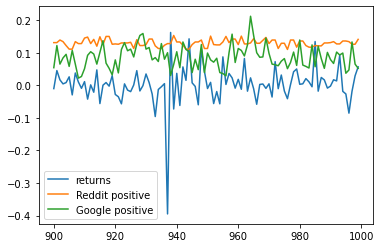

In [32]:
bitcoin_df[["returns","Reddit positive", "Google positive"]][900:1000].plot()

In [33]:
temp1 = []
temp2 = []
for i in range(len(bitcoin_df.loc[bitcoin_df['wordbank'] == 1])):
    temp1.append(str(bitcoin_df.loc[i]['Reddit text']))
    temp2.append(str(bitcoin_df.loc[i]['Google text']))

reddit_text = ' '.join(temp1)
google_text = ' '.join(temp2)

In [34]:
# Getting the TF-IDF
reddit_vectorizer = TfidfVectorizer(stop_words="english")
reddit_corpus = reddit_vectorizer.fit_transform([reddit_text])

In [35]:
reddit_words_corpus = reddit_vectorizer.get_feature_names()
# Getting the TF-IDF weight of each word in corpus as DataFrame
reddit_words_corpus_df = pd.DataFrame(
    list(zip(reddit_words_corpus, np.ravel(reddit_corpus.mean(axis=0)))), columns=["Word", "TF-IDF"]
)

reddit_words_corpus_df = reddit_words_corpus_df.sort_values(by=["TF-IDF"], ascending=False)
reddit_words_corpus_df = reddit_words_corpus_df.loc[reddit_words_corpus_df['TF-IDF'] > 0.04]
# Highest 10 TF-IDF scores
reddit_words_corpus_df

C:\Users\sator\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word,TF-IDF
4201,bitcoin,0.816146
16988,people,0.155213
11356,gt,0.145543
13404,just,0.137515
14093,like,0.123647
5306,cash,0.102786
12081,https,0.095549
8442,don,0.091656
4866,btc,0.088858
6094,com,0.085331


In [36]:
google_vectorizer = TfidfVectorizer(stop_words="english")
google_corpus = google_vectorizer.fit_transform([google_text])

In [37]:
google_words_corpus = google_vectorizer.get_feature_names()
# Getting the TF-IDF weight of each word in corpus as DataFrame
google_words_corpus_df = pd.DataFrame(
    list(zip(google_words_corpus, np.ravel(google_corpus.mean(axis=0)))), columns=["Word", "TF-IDF"]
)

google_words_corpus_df = google_words_corpus_df.sort_values(by=["TF-IDF"], ascending=False)
google_words_corpus_df = google_words_corpus_df.loc[google_words_corpus_df['TF-IDF'] > 0.04]
# Highest 10 TF-IDF scores
google_words_corpus_df

C:\Users\sator\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word,TF-IDF
593,bitcoin,0.861974
1144,cryptocurrency,0.212904
2787,new,0.117385
1143,cryptocurrencies,0.111631
621,blockchain,0.107027
1290,digital,0.105877
1162,currency,0.093217
3148,price,0.092067
4524,world,0.063296
2701,money,0.057542


In [41]:
lemmatizer = WordNetLemmatizer()

In [39]:
# Define preprocess function
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [42]:
reddit_buzzword_score = []
google_buzzword_score = []
index_list = bitcoin_df.index.to_list()
for i in index_list[0:3]:
    try:
        reddit_score = 0
        for word in process_text(str(bitcoin_df['Reddit text'][i])):
            for j in range(len(reddit_words_corpus_df)):
                if reddit_words_corpus_df.iloc[j, 0] in word:
                    reddit_score += reddit_words_corpus_df.iloc[j, 1]
            
        google_score = 0
        for word in process_text(str(bitcoin_df['Google text'][i])):
            for j in range(len(google_words_corpus_df)):
                if google_words_corpus_df.iloc[j, 0] in word:
                    google_score += google_words_corpus_df.iloc[j, 1]        
        
        reddit_buzzword_score.append({
            "index": i,
            "reddit buzzword score": reddit_score
        })
        google_buzzword_score.append({
            "index": i,
            "google buzzword score": google_score
        })
    except AttributeError:
        pass

In [43]:
reddit_buzzword_df = pd.DataFrame(reddit_buzzword_score)
reddit_buzzword_df

,index,reddit buzzword score
0,0,222.498406
1,1,277.008948
2,2,408.781476


In [44]:
google_buzzword_df = pd.DataFrame(google_buzzword_score)
google_buzzword_df

,index,google buzzword score
0,0,10.390867
1,1,7.580534
2,2,10.291896


In [ ]:
# reddit_text_processed = process_text(reddit_text)
# reddit_buzzwords = Counter(reddit_text_processed)
# print(dict(reddit_buzzwords.most_common(250)))

In [ ]:
# google_text_processed = process_text(google_text)
# google_buzzwords = Counter(google_text_processed)
# print(dict(google_buzzwords.most_common(250)))

In [ ]:
# bitcoin_df.drop(['Reddit text', 'Reddit neutral', 'Google text', 'Google neutral', 'wordbank'],axis=1, inplace=True)
# bitcoin_df.to_csv('machine_learning_df.csv')

In [ ]:
# bitcoin_df

In [ ]:
# print(dict(reddit_buzzwords.most_common(10)))

In [ ]:
# print(dict(reddit_buzzwords.most_common(10)).keys())

In [ ]:
# reddit_buzzword_score = []
# google_buzzword_score = []
# index_list = bitcoin_df.index.to_list()
# for i in index_list:

#     try:
#         reddit_score = 0
#         for word in process_text(str(bitcoin_df['Reddit text'][i])):
#             if word in (dict(reddit_buzzwords.most_common(100)).keys()):
#                 reddit_score += 1
#             if word in (dict(reddit_buzzwords.most_common(250)).keys()):
#                 reddit_score += 1

#         google_score = 0
#         for word in process_text(str(bitcoin_df['Google text'][i])):
#             if word in (dict(google_buzzwords.most_common(100)).keys()):
#                 google_score += 1
#             if word in (dict(google_buzzwords.most_common(250)).keys()):
#                 google_score += 1

#         reddit_buzzword_score.append({
#             "index": i,
#             "reddit buzzword score": reddit_score
#         })
#         google_buzzword_score.append({
#             "index": i,
#             "reddit buzzword score": google_score
#         })
#     except AttributeError:
#         pass

In [ ]:
# reddit_buzzword_score

In [ ]:
# index_list = bitcoin_df.index.to_list()
# for i in index_list[0:3]:
#     print((bitcoin_df['Reddit text'][i]))

In [ ]:
# score = 0
# for word in process_text(bitcoin_df['Reddit text'][5]):
#     if word in (dict(reddit_buzzwords.most_common(100)).keys()):
#         score += 1
#     if word in (dict(reddit_buzzwords.most_common(250)).keys()):
#         score += 1
        
# print(score)